In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

In [2]:
aqi= pd.read_csv('C:\\Users\\hp\\Desktop\\PYTHON\\Stat\\Day 1\\c4_epa_air_quality.csv')
aqi= aqi.dropna()

In [3]:
aqi.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6
10,10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,0.247368,3


In [4]:
aqi['state_name'].describe()

count            257
unique            51
top       California
freq              66
Name: state_name, dtype: object

In [5]:
aqi['state_name'].value_counts().head(10)

state_name
California      66
Arizona         14
Ohio            12
Florida         12
Texas           10
New York        10
Pennsylvania     9
Michigan         9
Colorado         9
Minnesota        7
Name: count, dtype: int64

In [6]:
aqi['state_name'].shape

(257,)

In [7]:
aqi['state_name'].unique()

array(['Arizona', 'Ohio', 'Wyoming', 'Pennsylvania', 'Iowa', 'Hawaii',
       'Colorado', 'Minnesota', 'Indiana', 'Missouri', 'Connecticut',
       'California', 'Nevada', 'Virginia', 'Rhode Island', 'Texas',
       'Illinois', 'Kansas', 'Maryland', 'New Jersey', 'Massachusetts',
       'Maine', 'Idaho', 'Florida', 'Vermont', 'Tennessee', 'Georgia',
       'South Dakota', 'North Carolina', 'Michigan', 'Nebraska',
       'Alabama', 'Washington', 'Kentucky', 'Oklahoma', 'New York',
       'North Dakota', 'Montana', 'Utah', 'Delaware', 'New Hampshire',
       'Louisiana', 'Mississippi', 'New Mexico', 'Oregon',
       'District Of Columbia', 'Arkansas', 'Puerto Rico',
       'South Carolina', 'Alaska', 'Wisconsin'], dtype=object)

In [8]:
aqi['aqi'].mean()

6.782101167315175

In [9]:
rre_states = ['Florida','Ohio','California', 'Michigan', 'Texas']

In [10]:

aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

aqi_rre.groupby(['state_name']).agg({'aqi': 'mean', 'state_name':'count'})


,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Texas,2.700000,10


<Axes: xlabel='state_name', ylabel='aqi'>

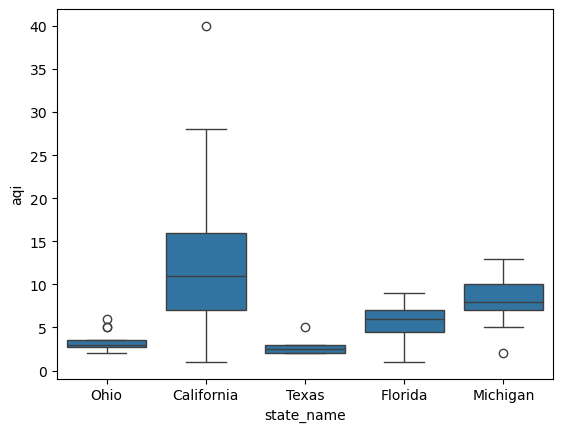

In [11]:
sns.boxplot(x = aqi_rre['state_name'], y = aqi_rre['aqi'])

In [12]:
# Find the mean aqi for your state.

aqi_tx = aqi[aqi['state_name'] == 'Texas']

sample_mean = aqi_tx['aqi'].mean()
sample_mean

2.7

In [13]:
#Calculate your margin of error

z_value = 1.96 #chosen confidence level
standard_error = aqi_tx['aqi'].std() / np.sqrt(aqi_tx.shape[0])  #calculate standard error

margin_of_error = standard_error * z_value
margin_of_error

0.588

In [14]:
z_value = 1.65
standard_error = aqi_tx['aqi'].std() / np.sqrt(aqi_tx.shape[0])

margin_of_error = standard_error * z_value
margin_of_error

0.49499999999999994

In [15]:
z_value = 2.58
standard_error = aqi_tx['aqi'].std() / np.sqrt(aqi_tx.shape[0])

margin_of_error = standard_error * z_value
margin_of_error

0.774

In [16]:
upper_limit = sample_mean + margin_of_error
lower_limit = sample_mean - margin_of_error
(upper_limit, lower_limit)

(3.474, 1.9260000000000002)

In [21]:
confidence_interval = stats.norm.ppf([0.05, 0.95], loc=sample_mean, scale= standard_error)
confidence_interval

array([2.20654391, 3.19345609])